In [96]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
!geopandas
# import geopandas as gpd
import autoreload
import os
import sys
import csv

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')

'geopandas' is not recognized as an internal or external command,
operable program or batch file.


In [75]:
df = pd.read_csv("D:\Open Classroom\Datasets\Global Missing Migrants Dataset\Global Missing Migrants Dataset.csv")
df.head(3)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 19 columns):
Incident Type                          13020 non-null object
Incident year                          13020 non-null int64
Reported Month                         13020 non-null object
Region of Origin                       12998 non-null object
Region of Incident                     13020 non-null object
Country of Origin                      13012 non-null object
Number of Dead                         12470 non-null float64
Minimum Estimated Number of Missing    13020 non-null int64
Total Number of Dead and Missing       13020 non-null int64
Number of Survivors                    13020 non-null int64
Number of Females                      13020 non-null int64
Number of Males                        13020 non-null int64
Number of Children                     13020 non-null int64
Cause of Death                         13020 non-null object
Migration route                        9999

In [77]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Incident year,13020.0,2019.0,2.0,2014.0,2017.0,2019.0,2021.0,2023.0
Number of Dead,12470.0,3.0,10.0,0.0,1.0,1.0,2.0,750.0
Minimum Estimated Number of Missing,13020.0,2.0,16.0,-2.0,0.0,0.0,0.0,750.0
Total Number of Dead and Missing,13020.0,4.0,20.0,1.0,1.0,1.0,2.0,1022.0
Number of Survivors,13020.0,7.0,42.0,-2.0,0.0,0.0,0.0,1950.0
Number of Females,13020.0,0.0,3.0,0.0,0.0,0.0,0.0,94.0
Number of Males,13020.0,1.0,4.0,0.0,0.0,1.0,1.0,135.0
Number of Children,13020.0,0.0,2.0,0.0,0.0,0.0,0.0,250.0


In [78]:
df.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

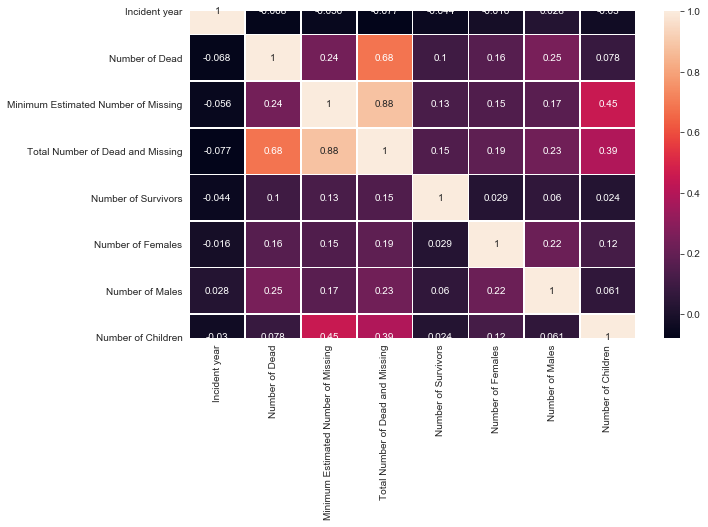

In [79]:
plt.figure(figsize=(10, 6))
sb.heatmap(df.corr(), annot=True, linewidths=0.6)

### Data Cleaning and Manipulation

In [80]:
df.isnull().sum()

Incident Type                             0
Incident year                             0
Reported Month                            0
Region of Origin                         22
Region of Incident                        0
Country of Origin                         8
Number of Dead                          550
Minimum Estimated Number of Missing       0
Total Number of Dead and Missing          0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Migration route                        3021
Location of death                         0
Information Source                        8
Coordinates                              36
UNSD Geographical Grouping                1
dtype: int64

In [81]:
df['Region of Origin'] = df['Region of Origin'].fillna(method='ffill')

In [82]:
df['Country of Origin'] = df['Country of Origin'].fillna(method='ffill')

In [83]:
df['Number'] = df['Number of Dead'].replace(np.nan, df['Number of Dead'].mean(), inplace = True)

In [84]:
df.drop(columns = ['Number'], inplace = True)

In [85]:
df['Migration route'] = df['Migration route'].replace(np.nan, 'NIL')

In [86]:
df[['Latitude', 'Longitude']] = df['Coordinates'].str.split(',', expand = True)

In [87]:
df.isnull().sum()

Incident Type                           0
Incident year                           0
Reported Month                          0
Region of Origin                        0
Region of Incident                      0
Country of Origin                       0
Number of Dead                          0
Minimum Estimated Number of Missing     0
Total Number of Dead and Missing        0
Number of Survivors                     0
Number of Females                       0
Number of Males                         0
Number of Children                      0
Cause of Death                          0
Migration route                         0
Location of death                       0
Information Source                      8
Coordinates                            36
UNSD Geographical Grouping              1
Latitude                               36
Longitude                              36
dtype: int64

In [88]:
df['Coordinates'].value_counts()

30.96704016, 61.82069052    200
35.68940913, 51.38958967     56
29.63186286, 52.51236196     50
35.6094831, 51.51405391      38
35.72628222, 51.37384373     36
                           ... 
32.79304852, 12.72688316      1
32.3797, -112.7411            1
0.487983, 42.77828            1
15.5466581, 42.3282464        1
43.767444, 18.293684          1
Name: Coordinates, Length: 9582, dtype: int64

### Statistical Reresentation

In [89]:
df.head(2)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Latitude,Longitude
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,31.650259,-110.366453
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,31.59713,-111.73756


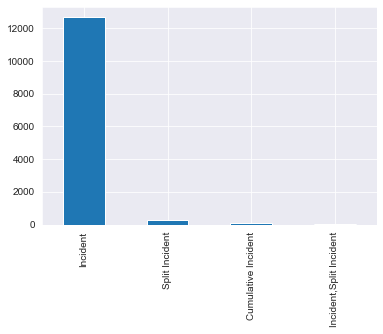

In [90]:
df['Incident Type'].value_counts().plot(kind='bar')

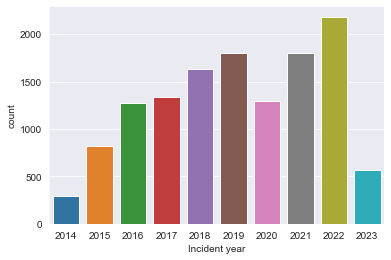

In [91]:
sb.countplot(df['Incident year'])

Text(0, 0.5, '')

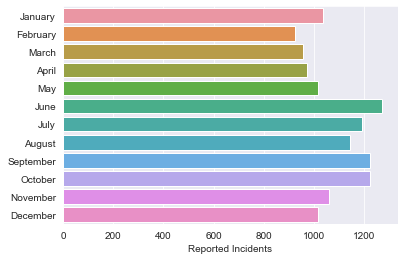

In [92]:
sb.countplot(y = df['Reported Month'])
plt.xlabel('Reported Incidents')
plt.ylabel(None)

In [93]:
# Create a GeoDataFrame using the Latitude and Longitude columns
geometry = gpd.points_from_xy(df['Longitude'], df['Latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the coordinates on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(10, 6))
gdf.plot(ax=ax, marker='o', color='red', markersize=50)

plt.show()

NameError: name 'gpd' is not defined

In [100]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# Create a Cartopy map with a specific projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Plot some data points
lats = [40.7128, 34.0522, 37.7749, 41.8781]
lons = [-74.0060, -118.2437, -122.4194, -87.6298]
ax.plot(lons, lats, 'ro', transform=ccrs.PlateCarree())

# Set title
plt.title('Map with Cartopy')

# Show the plot
plt.show()


ModuleNotFoundError: No module named 'cartopy'